<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/Superstore_Sales_Data_Analysis_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset?resource=download
dataURL = 'https://github.com/Praxis-QR/FDS/raw/main/data/SuperStoreSalesKaggle.zip'
dfS3K = pd.read_csv(dataURL)
dfS3K.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011


#First Look

In [4]:
#How many rows, columns
dfS3K.shape

(51290, 21)

In [5]:
#is there any missing value? In this case, not
dfS3K.count()

order_id          51290
order_date        51290
ship_date         51290
ship_mode         51290
customer_name     51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

In [6]:
# what is the first and last order date ?
# we have four years of data
dfS3K['order_date'].describe

<bound method NDFrame.describe of 0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: order_date, Length: 51290, dtype: object>

In [7]:
#how many countries?
#dfS3K['country'].unique()  # array of unique countries
len(dfS3K['country'].unique())

147

In [8]:
#How many countries, markets, regions, segments
len(dfS3K['country'].unique()), len(dfS3K['market'].unique()), len(dfS3K['region'].unique()), len(dfS3K['segment'].unique())

(147, 7, 13, 3)

In [9]:
#How many product_id, category, sub_category, product_name
len(dfS3K['product_id'].unique()), len(dfS3K['category'].unique()), len(dfS3K['sub_category'].unique()), len(dfS3K['product_name'].unique())

(10292, 3, 17, 3788)

#One Dimensional Analysis : Top 10s

In [10]:
#Reduce the data, drop some columns
allColumns = dfS3K.columns
allColumns
dropColumns = ['order_id',  'customer_name']
dfS3K.drop(dropColumns, axis=1, inplace= True)
dfS3K.shape


(51290, 19)

In [11]:
#dfS3K.sales is type object or string
dfS3K['sales'] = dfS3K['sales'].str.replace(',', '')    # replace , with blank
dfS3K['sales'] = pd.to_numeric(dfS3K['sales'])          # convert column "a" of a DataFrame
dfS3K.sales


0        408
1        120
2         66
3         45
4        114
        ... 
51285     14
51286      4
51287     26
51288      7
51289      3
Name: sales, Length: 51290, dtype: int64

In [12]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('region').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('region').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
region,,,,,
Central,2822399,41762,1543.61,311403.98,296940.56
South,1600960,25206,990.44,140355.77,168474.07
North,1248192,18021,459.63,194597.95,131474.09
Oceania,1100207,12838,534.10,121666.64,120628.51
Southeast Asia,884438,11822,851.33,17852.33,93675.84
North Asia,848349,8851,113.90,165578.42,95030.61
EMEA,806184,11517,986.10,43897.97,88375.73
Africa,783776,10564,718.80,88871.63,88139.47
Central Asia,752839,7715,138.20,132480.19,77830.15


In [13]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('country').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('country').sum()[AllNumeric].sort_values('profit',axis=0, ascending= False).round(decimals = 2)
dfS3K.groupby('country').sum()[AllNumeric].sort_values('profit',axis=0, ascending= False).round(decimals = 2).head(10)

,sales,quantity,discount,profit,shipping_cost
country,,,,,
United States,2297354,37873,1561.09,286397.02,238173.79
China,700591,7081,26.90,150683.08,78957.02
India,589664,5758,27.50,129071.84,61780.72
United Kingdom,528570,6161,107.30,111900.15,53580.27
France,858930,10804,204.35,109029.00,95387.81
Germany,628857,7745,117.80,107322.82,63965.18
Australia,925257,10673,407.20,105484.96,100359.02
Mexico,622620,10011,162.93,102818.10,67659.85
Spain,287162,3240,29.90,54390.12,29848.09


In [14]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('market').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('market').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
market,,,,,
APAC,3585833,41226,1637.53,437577.58,387165.11
EU,2938139,37773,1031.05,372829.74,309422.35
US,2297354,37873,1561.09,286397.02,238173.79
LATAM,2164687,38526,1395.16,221643.49,234138.61
EMEA,806184,11517,986.10,43897.97,88375.73
Africa,783776,10564,718.80,88871.63,88139.47
Canada,66932,833,0.00,17817.39,7405.63


In [15]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('segment').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('segment').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
segment,,,,,
Consumer,6508141,92157,3808.04,749239.78,697300.64
Corporate,3824808,53565,2205.28,442785.86,410474.46
Home Office,2309956,32590,1316.40,277009.18,245045.59


In [16]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('category').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('category').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
category,,,,,
Technology,4744691,35176,1372.51,663778.73,507048.74
Furniture,4110884,34954,1660.03,286782.25,440320.66
Office Supplies,3787330,108182,4297.19,518473.83,405451.29


In [17]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('sub_category').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('sub_category').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
sub_category,,,,,
Phones,1706874,11870,489.61,216717.01,184902.77
Copiers,1509439,7454,260.42,258567.55,159496.49
Chairs,1501682,12336,560.12,141973.80,164229.85
Bookcases,1466559,8310,370.71,161924.42,155482.23
Storage,1127124,16917,700.49,108461.49,120546.46
Appliances,1011081,6078,248.70,141680.59,108300.78
Machines,779071,4906,252.00,58867.87,79135.90
Tables,757034,3083,250.32,-64083.39,79861.46
Accessories,749307,10946,370.48,129626.31,83513.58


#Two Dimensional Analysis

##Basic Pivot

In [18]:
pd.pivot_table(dfS3K, index = 'region', columns = 'category', values = 'sales', aggfunc = 'sum')

category,Furniture,Office Supplies,Technology
region,,,
Africa,194650,266752,322374
Canada,10595,30037,26300
Caribbean,118379,89565,116337
Central,860413,923471,1038515
Central Asia,284369,162768,305702
EMEA,228627,276712,300845
East,208291,205549,264994
North,377612,374778,495802
North Asia,335725,198581,314043


In [19]:
pd.pivot_table(dfS3K, index = 'region', columns = 'sub_category', values = 'sales', aggfunc = 'sum')

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
region,,,,,,,,,,,,,,,,,
Africa,42178,62196,38433,22308,83457,56040,96257,9687,5821,20622,4879,69109,13498,114830,96671,13259,34531
Canada,4472,7941,4121,3091,5734,3202,7467,567,478,809,423,4275,1520,10086,10586,1310,850
Caribbean,20294,30062,6085,8463,39363,45186,49999,6341,3344,10170,2195,5164,7183,40880,18668,7224,23660
Central,174124,214856,112201,130246,315413,328569,322978,37354,18324,83305,15655,171198,51831,370215,292394,50610,133126
Central Asia,43619,55618,10827,12291,120159,90673,91403,10911,5703,22025,4517,37965,14715,132715,33636,14550,51512
EMEA,44166,68268,38160,26685,91735,69821,80131,10572,6351,27740,4096,62027,10246,114521,98182,14152,39331
East,45038,34191,7498,53501,43819,96263,53220,4375,821,29067,2608,66108,20174,100628,71618,10763,39142
North,69283,107381,43815,31743,159661,123574,175891,22142,9980,22728,6996,70209,17010,180419,112389,23322,71649
North Asia,39296,55909,16444,14672,130070,129336,123039,13859,7299,22020,5168,48838,14194,102870,53743,17293,54299


In [20]:
#too much information
pd.pivot_table(dfS3K, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins = True)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
country,,,,,,,,,,,,,,,,,,
Afghanistan,2047.0,669.0,444.0,586.0,2802.0,1331.0,1139.0,514.0,59.0,812.0,119.0,346.0,309.0,2930.0,762.0,464.0,6341.0,21674
Albania,NaN,NaN,223.0,34.0,778.0,NaN,NaN,NaN,NaN,58.0,11.0,1704.0,NaN,736.0,344.0,NaN,NaN,3888
Algeria,1237.0,3785.0,1697.0,1249.0,6130.0,1350.0,4823.0,532.0,497.0,627.0,145.0,4824.0,1965.0,2706.0,4012.0,191.0,320.0,36090
Angola,1597.0,118.0,532.0,686.0,4637.0,982.0,950.0,428.0,290.0,917.0,519.0,963.0,286.0,5141.0,5161.0,149.0,2195.0,25551
Argentina,3508.0,3041.0,1645.0,315.0,7706.0,11101.0,8516.0,1383.0,595.0,1279.0,282.0,594.0,1247.0,7895.0,3950.0,1014.0,3439.0,57510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,5742.0,8656.0,1595.0,1466.0,5906.0,11284.0,6195.0,1245.0,547.0,2335.0,626.0,1770.0,1012.0,8615.0,4609.0,1973.0,2226.0,65802
Yemen,NaN,719.0,219.0,20.0,NaN,53.0,214.0,12.0,NaN,28.0,NaN,459.0,33.0,203.0,408.0,21.0,75.0,2464
Zambia,443.0,1314.0,891.0,472.0,5452.0,1774.0,2909.0,559.0,148.0,847.0,149.0,2812.0,287.0,2134.0,3474.0,230.0,2134.0,26029


## Reduced Pivot

In [21]:
top5CountriesProfit = ['United States', 'China', 'India','United Kingdom', 'France']
top5SubCategoriesSales = ['Phones','Copiers','Chairs','Bookcases','Storage']
#dfS3K_TC = dfS3K[dfS3K['country'].isin(top5CountriesProfit) ]
#dfS3K_TC = dfS3K[dfS3K['sub_category'].isin(top5SubCategoriesSales) ]
dfS3K_TC = dfS3K[dfS3K['sub_category'].isin(top5SubCategoriesSales) & dfS3K['country'].isin(top5CountriesProfit) ]
pd.pivot_table(dfS3K_TC, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#dfS3K_TC

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,All
country,,,,,,
China,106036,108830,109252,79329,43743,447190
France,95308,91512,95140,89966,96571,468497
India,88984,68875,70384,104630,27644,360517
United Kingdom,69865,26872,68430,77649,60304,303120
United States,114879,328454,149530,330047,223862,1146772
All,475072,624543,492736,681621,452124,2726096


In [22]:
dfS3K_2 = dfS3K.copy()
dfS3K_2.loc[~dfS3K_2['country'].isin(top5CountriesProfit),'country'] = 'others'
dfS3K_2.loc[~dfS3K_2['sub_category'].isin(top5SubCategoriesSales),'sub_category'] = 'others'
pd.pivot_table(dfS3K_2, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#dfS3K_2['country'].unique()

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,others,All
country,,,,,,,
China,106036,108830,109252,79329,43743,253401,700591
France,95308,91512,95140,89966,96571,390433,858930
India,88984,68875,70384,104630,27644,229147,589664
United Kingdom,69865,26872,68430,77649,60304,225450,528570
United States,114879,328454,149530,330047,223862,1150582,2297354
others,991487,877139,1016703,1025253,675000,3082214,7667796
All,1466559,1501682,1509439,1706874,1127124,5331227,12642905


#80:20 Analysis

## Countries accounting for 80% profits

In [23]:
#AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
#dfS3K_3 = dfS3K.copy()
dfS3K.groupby('country').sum()['profit'].round(decimals = 2)
dfS3K_3 = dfS3K.groupby('country').sum()['profit'].sort_values(ascending= False).round().to_frame()
dfS3K_3

,profit
country,
United States,286397.0
China,150683.0
India,129072.0
United Kingdom,111900.0
France,109029.0
...,...
Pakistan,-22447.0
Honduras,-29482.0
Netherlands,-41070.0


In [24]:
#T = dfS3K_3.sum()['profit']
dfS3K_3['profit_pct'] = dfS3K_3['profit']/dfS3K_3.sum()['profit']
dfS3K_3

,profit,profit_pct
country,,
United States,286397.0,0.194956
China,150683.0,0.102573
India,129072.0,0.087862
United Kingdom,111900.0,0.076173
France,109029.0,0.074218
...,...,...
Pakistan,-22447.0,-0.015280
Honduras,-29482.0,-0.020069
Netherlands,-41070.0,-0.027957


In [25]:
dfS3K_3.cumsum()['profit_pct'].to_frame().head(10)

,profit_pct
country,
United States,0.194956
China,0.297529
India,0.385391
United Kingdom,0.461564
France,0.535782
Germany,0.608839
Australia,0.680645
Mexico,0.750636
Spain,0.787660


In [26]:
#dfS3K_3.cumsum()['profit_pct'].to_frame().head(10).index
Countries80pcProfit = ['United States', 'China', 'India', 'United Kingdom', 'France', 'Germany', 'Australia', 'Mexico', 'Spain']

## Sub Categories accounting for 80% profit

In [27]:
dfS3K.groupby('sub_category').sum()['profit'].round(decimals = 2)
dfS3K_3 = dfS3K.groupby('sub_category').sum()['profit'].sort_values(ascending= False).round().to_frame()
dfS3K_3['profit_pct'] = dfS3K_3['profit']/dfS3K_3.sum()['profit']
dfS3K_3.cumsum()['profit_pct'].to_frame().head(10)

,profit_pct
sub_category,
Copiers,0.176012
Phones,0.323536
Bookcases,0.433760
Chairs,0.530405
Appliances,0.626850
Accessories,0.715088
Storage,0.788920
Binders,0.838238
Paper,0.878542


In [28]:
#dfS3K_3.cumsum()['profit_pct'].to_frame().head(10).index
SubCat80pcProfit = ['Copiers', 'Phones', 'Bookcases', 'Chairs', 'Appliances', 'Accessories','Storage']

## Reduced Data Set (80/20)

In [29]:
dfS3K_3 = dfS3K.copy()
dfS3K_3.loc[~dfS3K_3['country'].isin(Countries80pcProfit),'country'] = 'others'
dfS3K_3.loc[~dfS3K_3['sub_category'].isin(SubCat80pcProfit),'sub_category'] = 'others'
pd.pivot_table(dfS3K_3, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#dfS3K_2['country'].unique()

sub_category,Accessories,Appliances,Bookcases,Chairs,Copiers,Phones,Storage,others,All
country,,,,,,,,,
Australia,55167,94172,127174,142474,138263,101706,55176,211125,925257
China,33029,42120,106036,108830,109252,79329,43743,178252,700591
France,49157,78101,95308,91512,95140,89966,96571,263175,858930
Germany,35566,41876,69344,49817,77093,104590,72657,177914,628857
India,33649,45209,88984,68875,70384,104630,27644,150289,589664
Mexico,40154,49549,77309,84389,98953,93231,41971,137064,622620
Spain,18243,35991,40481,15052,38314,34035,35728,69318,287162
United Kingdom,23618,47980,69865,26872,68430,77649,60304,153852,528570
United States,167401,107538,114879,328454,149530,330047,223862,875643,2297354


##Pie Charts

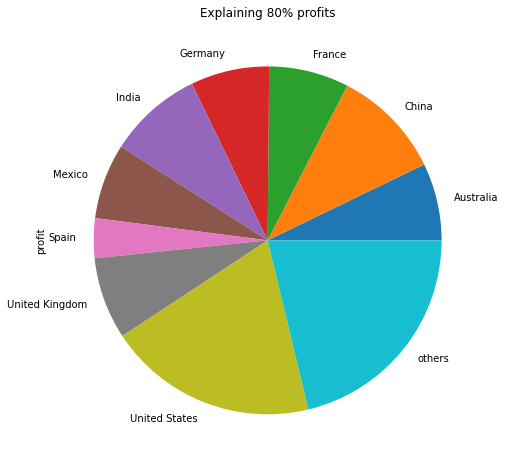

In [30]:
dfS3K_3.groupby('country').sum()['profit'].plot(kind='pie',figsize=(8, 8), title = 'Explaining 80% profits')

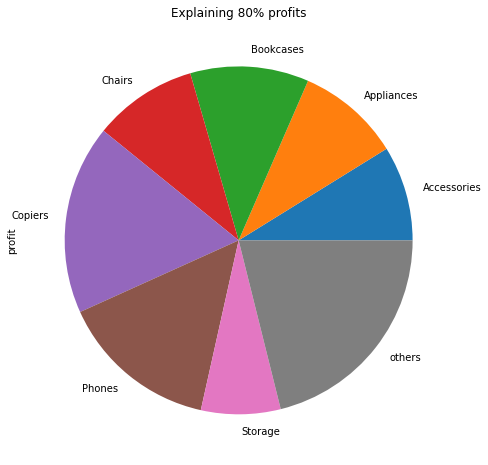

In [31]:
dfS3K_3.groupby('sub_category').sum()['profit'].plot(kind='pie',figsize=(8, 8), title = 'Explaining 80% profits')

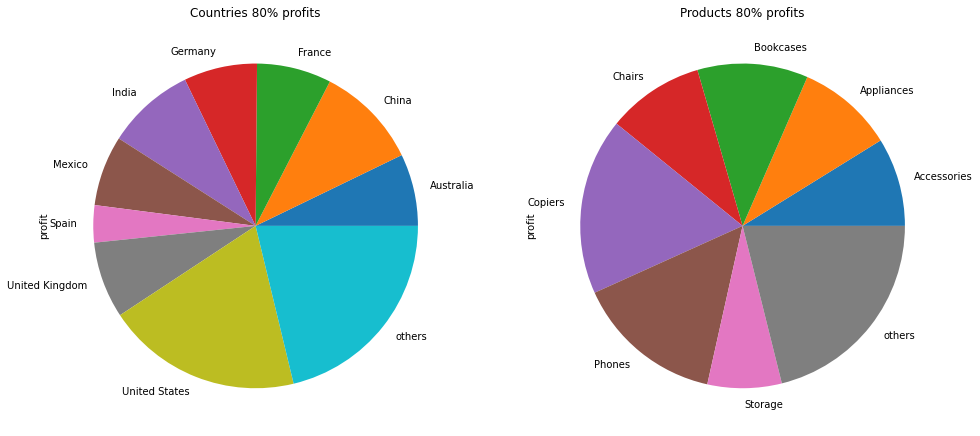

In [32]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (16,8))
dfS3K_3.groupby('country').sum()['profit'].plot(kind='pie', title = 'Countries 80% profits',ax=axes[0])
dfS3K_3.groupby('sub_category').sum()['profit'].plot(kind='pie', title = 'Products 80% profits',ax=axes[1])
#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])

#Time Series

In [33]:
dfS3K_4 = dfS3K_3.copy()
dfS3K_4.columns

Index(['order_date', 'ship_date', 'ship_mode', 'segment', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [34]:
dropColumns = ['ship_mode', 'segment', 'state', 
       'market', 'region', 'product_id', 'category', 
       'product_name', 'sales',  'discount', 'profit',
       'shipping_cost', 'order_priority']
dfS3K_4.drop(dropColumns, axis=1, inplace= True)
dfS3K_4.shape

(51290, 6)

In [35]:
dfS3K_4.columns

Index(['order_date', 'ship_date', 'country', 'sub_category', 'quantity',
       'year'],
      dtype='object')

In [36]:
dfS3K_4['year'] = dfS3K_4['year'].astype(str)

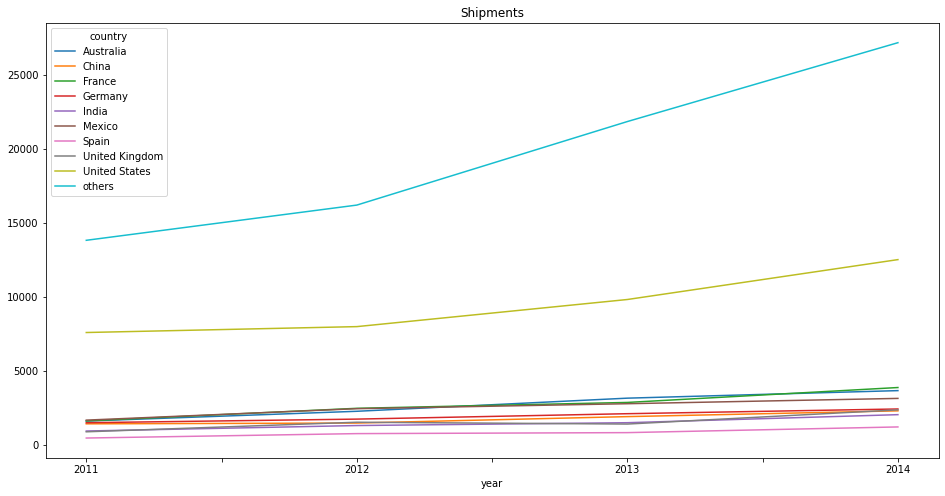

In [37]:
pd.pivot_table(dfS3K_4, index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(figsize = (16,8),title = 'Shipments')

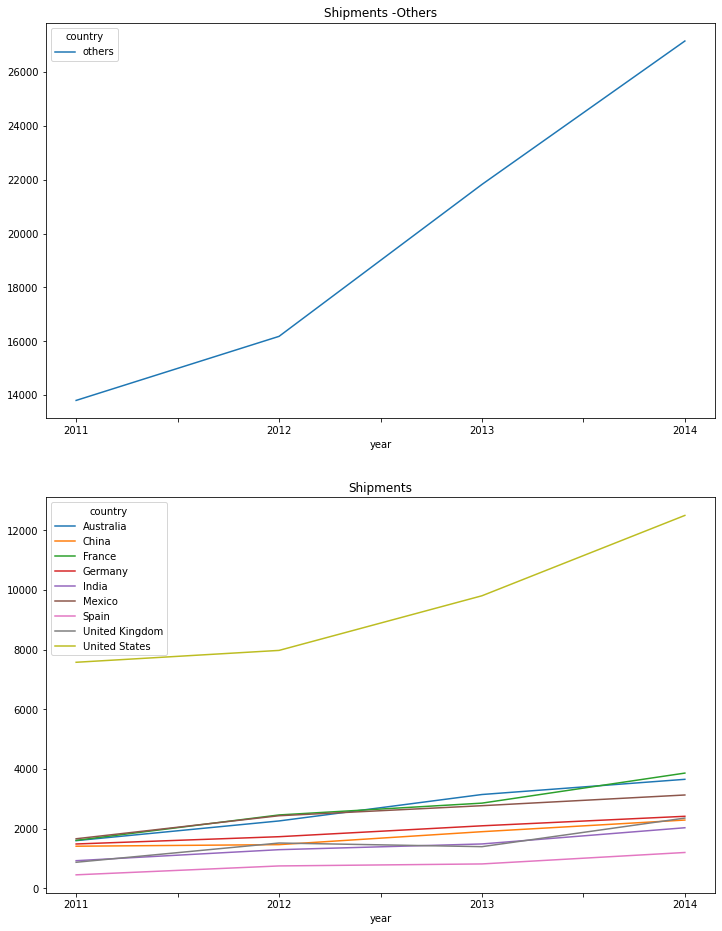

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_4[dfS3K_4['country'] == 'others'], index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments -Others')
pd.pivot_table(dfS3K_4[dfS3K_4['country'] != 'others'], index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')
#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])

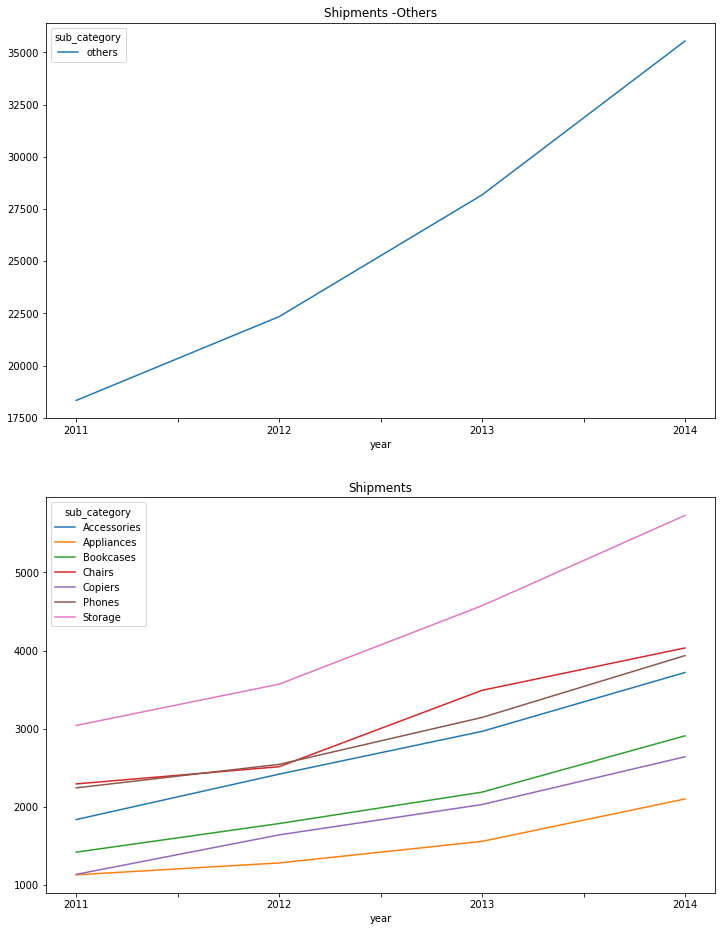

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'] == 'others'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments -Others')
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'] != 'others'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')

In [40]:
dfS3K_4['shp-yr-mon'] = pd.to_datetime(dfS3K_4['ship_date']).dt.strftime('%Y-%m')


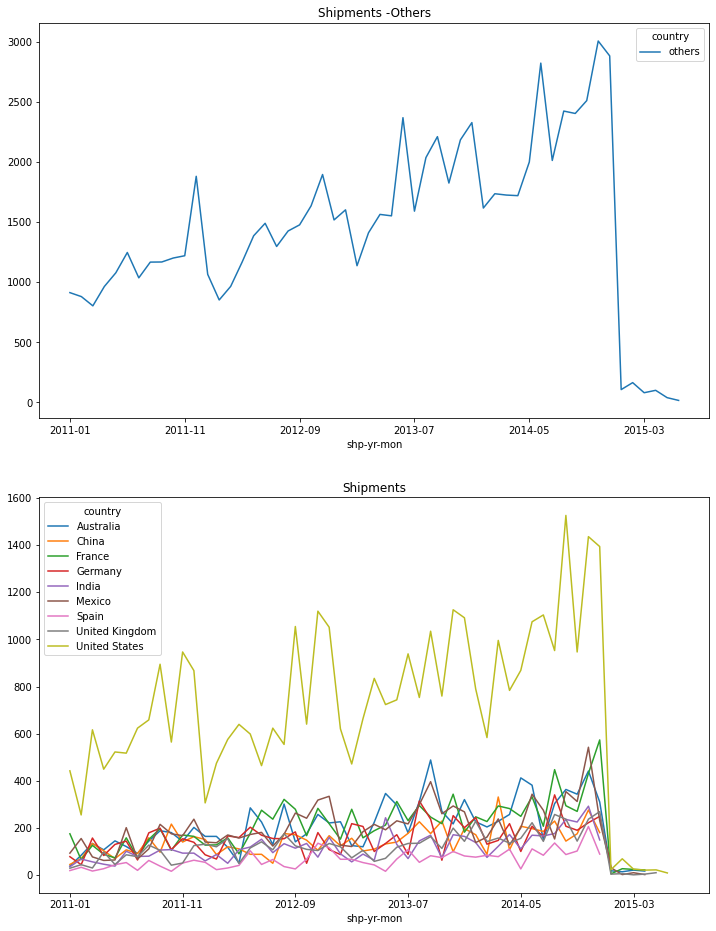

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_4[dfS3K_4['country'] == 'others'], index = 'shp-yr-mon', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments -Others')
pd.pivot_table(dfS3K_4[dfS3K_4['country'] != 'others'], index = 'shp-yr-mon', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')

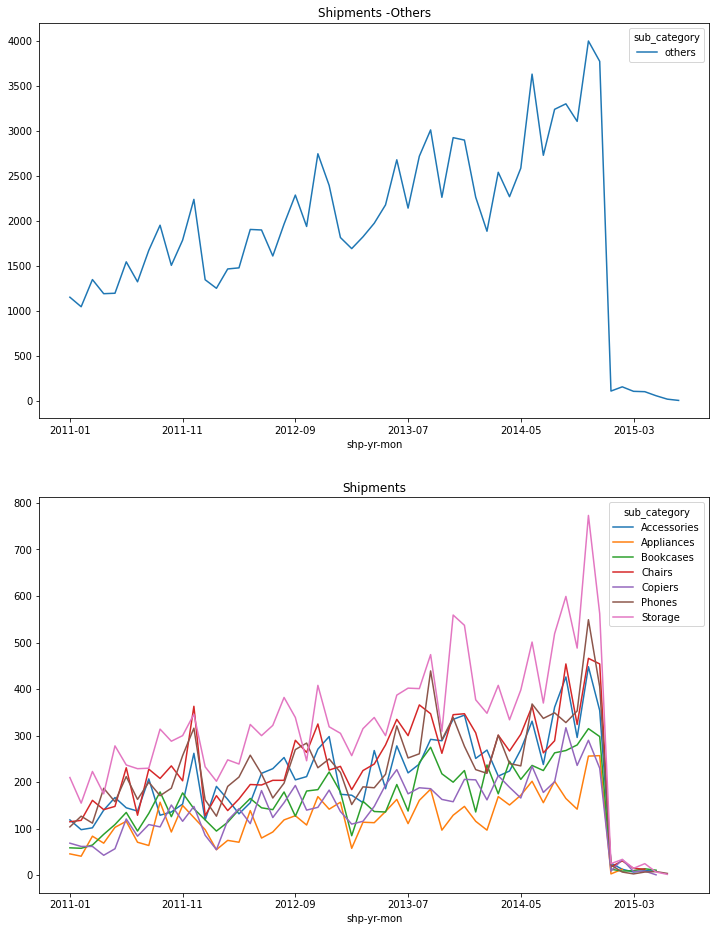

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'] == 'others'], index = 'shp-yr-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments -Others')
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'] != 'others'], index = 'shp-yr-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')

In [43]:
dfS3K_4['shp-mon'] = pd.to_datetime(dfS3K_4['ship_date']).dt.strftime('%m')

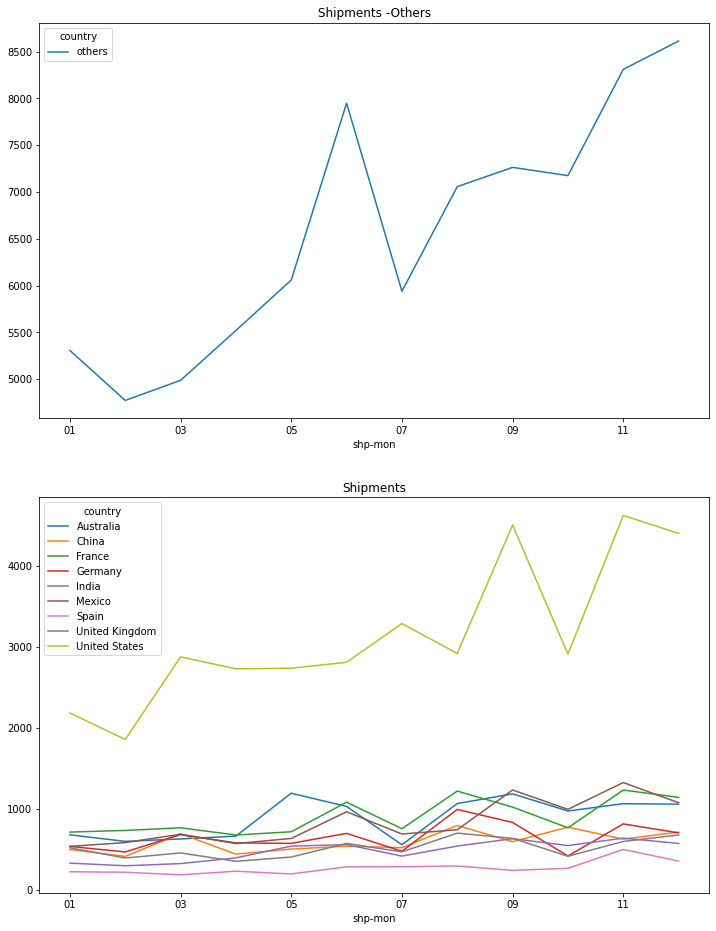

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_4[dfS3K_4['country'] == 'others'], index = 'shp-mon', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments -Others')
pd.pivot_table(dfS3K_4[dfS3K_4['country'] != 'others'], index = 'shp-mon', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')

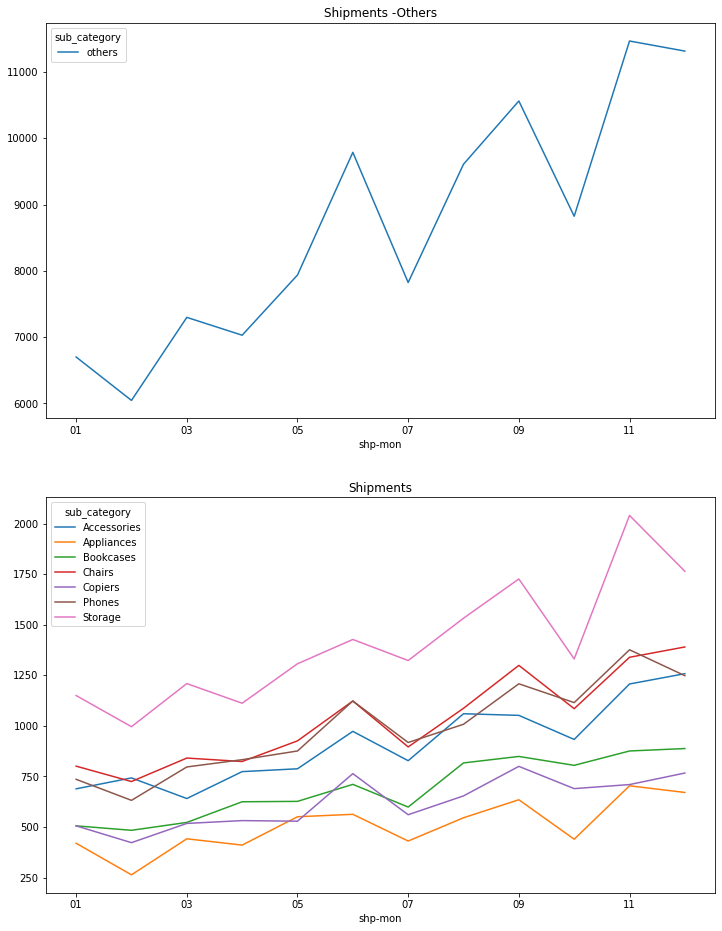

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'] == 'others'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments -Others')
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'] != 'others'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')

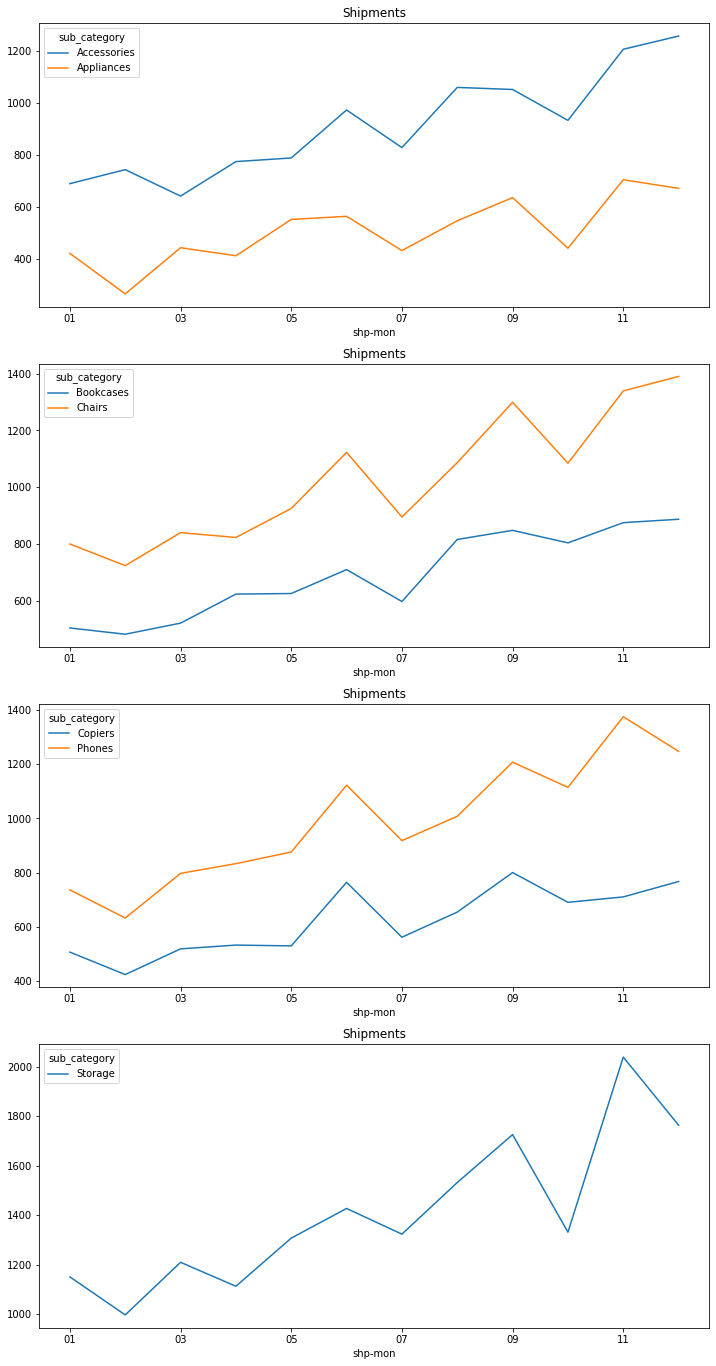

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize= (12,24))
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'].isin(['Accessories','Appliances'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments')
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'].isin(['Bookcases','Chairs'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'].isin(['Copiers','Phones'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[2],title = 'Shipments')
pd.pivot_table(dfS3K_4[dfS3K_4['sub_category'].isin(['Storage'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[3],title = 'Shipments')

In [47]:
#df['Week_Number'] = df['Date'].dt.isocalendar().week
dfS3K_4['shp-Week'] = pd.to_datetime(dfS3K_4['ship_date']).dt.isocalendar().week

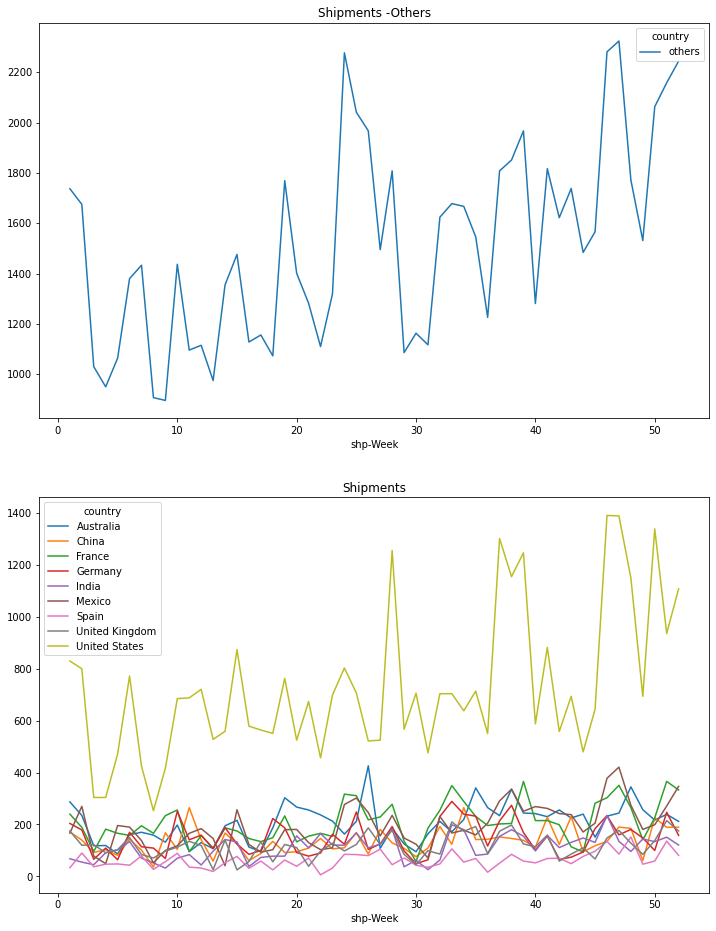

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_4[dfS3K_4['country'] == 'others'], index = 'shp-Week', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments -Others')
pd.pivot_table(dfS3K_4[dfS3K_4['country'] != 'others'], index = 'shp-Week', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments')

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)